---
title: "Geographic Analysis of Charity Donors - Latest Leaflet Map"
author: "Daniel Smith"
date: "2024-03-31"
categories: [Python, Pandas, Folium, GeoPy, HTML, Emmanuel House]
title-block-banner: false
jupyter: python3
image: 'preview.png'
draft: false
description: "Explore my latest interactive map displaying the geographic distribution of a fictional sample of donors to a Nottingham charity. The geodesic distance from the donor to the charity is engineered using GeoPy."
---

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import MarkerCluster
from branca.colormap import LinearColormap

from geopy.distance import geodesic

pd.set_option('display.max_columns', None)

In [45]:
df = pd.read_csv('data.csv')

In [46]:
df.head()

,Latitude,Longitude,Newsletter,Transactions_LifetimeGiftsAmount,Transactions_LifetimeGiftsNumber,Transactions_AverageGiftAmount,DonationFrequency,DonationFrequencyActive,Transactions_Months1To12GiftsAmount,Transactions_Months1To12GiftsNumber,monthlyDonorMonths1to12,Transactions_Months13To24GiftsAmount,Transactions_Months13To24GiftsNumber,monthlyDonorMonths13to24,Transactions_Months25To36GiftsAmount,Transactions_Months25To36GiftsNumber,monthlyDonorMonths25to36,Transactions_DateOfFirstGift,Transactions_FirstGiftAmount,Transactions_DateOfLastGift,Transactions_LastGiftAmount,monthsSinceFirstDonation,monthsSinceLastDonation,activeMonths,Transactions_DateOfHighestGift,Transactions_HighestGiftAmount,Transactions_DateOfLowestGift,Transactions_LowestGiftAmount
0,52.961066,-1.205200,1,419.66,4,104.915000,0.133333,0.148148,152.89,1,0,154.77,1,0,97.19,1,0,2021-10-23,96.09,2023-12-31,148.05,29,3,27,2024-01-01,148.44,2021-10-20,99.05
1,52.924105,-1.216433,1,111.05,3,37.016667,0.103448,0.230769,0.00,0,0,50.43,1,0,52.93,1,0,2021-11-26,48.27,2022-11-17,50.97,28,16,13,2022-11-21,48.67,2022-11-19,49.69
2,52.936510,-1.127547,1,982.82,11,89.347273,0.297297,1.000000,0.00,0,0,0.00,0,0,901.00,10,0,2021-03-30,97.38,2022-01-13,103.32,36,26,11,2022-01-12,97.97,2022-01-13,102.72
3,52.997952,-1.189854,1,20.45,2,10.225000,0.117647,2.000000,0.00,0,0,10.45,1,0,0.00,0,0,2022-12-06,10.03,2022-12-06,9.92,16,16,1,2022-12-06,9.79,2022-12-03,9.94
4,52.971756,-1.203969,1,20.75,2,10.375000,0.074074,2.000000,0.00,0,0,0.00,0,0,10.75,1,0,2022-01-20,10.52,2022-01-20,9.68,26,26,1,2022-01-23,9.64,2022-01-20,10.02


# The Data

The fictional donors in `data.csv` have the following features:

| Feature | Description |
| --- | --- |
| **Latitude** | The approximate latitude of the donor. |
| **Longitude** | The approximate longitude of the donor. |
| **Newsletter** | A binary indicator (1 or 0) representing whether the donor is subscribed to the Charity's email newsletter. |
|                |
| **Transactions_LifetimeGiftsAmount** | The total amount of donations made by the donor over their lifetime. |
| **Transactions_LifetimeGiftsNumber** | The total number of donations made by the donor over their lifetime. |
| **Transactions_AverageGiftAmount** | The average donation made by the donor. |
| **DonationFrequency** | The frequency of donations made by the donor (donations/month). |
| **DonationFrequencyActive** | The frequency of donations made by the donor while they were active (donations/month).|
| |
| **Transactions_Months1To12GiftsAmount** | The total amount of donations made by the donor in the latest 12 months. |
| **monthlyDonorMonths1to12** | A binary indicator showing if the donor made monthly donations in the latest 12 months. |
| **Transactions_Months13To24GiftsAmount** | The total amount of donations made by the donor in the latest 13-24 months. |
| **Transactions_Months13To24GiftsNumber** | The total number of donations made by the donor in the latest 13-24 months. |
| **monthlyDonorMonths13to24** | A binary indicator showing if the donor made monthly donations in the latest 13-24 months. |
| **Transactions_Months25To36GiftsAmount** | The total amount of donations made by the donor in the latest 25-36 months. |
| **Transactions_Months25To36GiftsNumber** | The total number of donations made by the donor in the latest 25-36 months. |
| **monthlyDonorMonths25to36** | A binary indicator showing if the donor made monthly donations in the latest 25-36 months. |
| |
| **Transactions_DateOfFirstGift** | The date of the first donation made by the donor. |
| **Transactions_FirstGiftAmount** | The amount of the first donation made by the donor. |
| **Transactions_DateOfLastGift** | The date of the last donation made by the donor. |
| **Transactions_LastGiftAmount** | The amount of the last donation made by the donor. |
| |
| **monthsSinceFirstDonation** | The number of months since the donor's first donation. |
| **monthsSinceLastDonation** | The number of months since the donor's last donation. |
| **activeMonths** | The number of months the donor has been an active supported of the Charity. |
| |
| **Transactions_DateOfHighestGift** | The date of the highest donation made by the donor. |
| **Transactions_HighestGiftAmount** | The amount of the highest donation made by the donor. |
| **Transactions_DateOfLowestGift** | The date of the lowest donation made by the donor. |
| **Transactions_LowestGiftAmount** | The amount of the lowest donation made by the donor. |

Note that these data points have been randomized, permuted and anonymized. This is not the true data of real donors to the charity.


In [47]:
df.sample(10)

,Latitude,Longitude,Newsletter,Transactions_LifetimeGiftsAmount,Transactions_LifetimeGiftsNumber,Transactions_AverageGiftAmount,DonationFrequency,DonationFrequencyActive,Transactions_Months1To12GiftsAmount,Transactions_Months1To12GiftsNumber,monthlyDonorMonths1to12,Transactions_Months13To24GiftsAmount,Transactions_Months13To24GiftsNumber,monthlyDonorMonths13to24,Transactions_Months25To36GiftsAmount,Transactions_Months25To36GiftsNumber,monthlyDonorMonths25to36,Transactions_DateOfFirstGift,Transactions_FirstGiftAmount,Transactions_DateOfLastGift,Transactions_LastGiftAmount,monthsSinceFirstDonation,monthsSinceLastDonation,activeMonths,Transactions_DateOfHighestGift,Transactions_HighestGiftAmount,Transactions_DateOfLowestGift,Transactions_LowestGiftAmount
396,52.924909,-1.225225,1,39.90,2,19.950000,0.055556,2.000000,0.00,0,0,0.00,0,0,19.90,1,0,2021-04-30,20.19,2021-05-01,20.07,35,35,1,2021-05-01,20.00,2021-04-30,20.32
68,52.981047,-1.127786,1,77.35,4,19.337500,0.108108,0.160000,24.71,1,0,25.23,1,0,24.41,1,0,2021-04-03,25.10,2023-03-30,25.29,36,12,25,2023-04-03,24.63,2023-04-02,24.64
236,52.921064,-1.225666,1,79.63,3,26.543333,0.187500,0.750000,14.04,1,0,49.34,1,0,0.00,0,0,2022-12-12,51.20,2023-03-31,15.03,15,12,4,2022-12-16,51.04,2023-03-31,14.82
597,52.957051,-1.092921,1,100.68,2,50.340000,0.071429,2.000000,0.00,0,0,0.00,0,0,50.68,1,0,2021-12-20,50.68,2021-12-22,49.91,27,27,1,2021-12-21,52.32,2021-12-20,49.68
537,52.947831,-1.033322,1,1670.94,37,45.160541,1.000000,1.000000,576.50,12,1,610.03,12,1,438.73,12,1,2021-04-15,29.51,2024-03-06,49.94,36,0,37,2024-03-08,50.83,2021-11-12,28.93
385,52.876109,-1.082670,1,50.10,2,25.050000,0.111111,2.000000,0.00,0,0,25.10,1,0,0.00,0,0,2022-10-12,24.37,2022-10-15,24.53,17,17,1,2022-10-14,25.06,2022-10-13,25.13
104,52.894064,-1.154259,1,278.45,13,21.419231,0.361111,0.361111,118.64,4,0,0.00,0,0,151.20,8,0,2021-04-27,20.65,2024-03-16,30.42,35,0,36,2024-03-16,29.50,2021-11-28,19.61
203,52.918321,-1.110018,1,419.42,9,46.602222,0.243243,1.125000,0.00,0,0,0.00,0,0,369.42,8,0,2021-04-01,49.65,2021-11-02,49.68,36,29,8,2021-11-01,49.63,2021-11-02,49.88
680,52.930533,-1.219289,0,408.60,2,204.300000,0.117647,2.000000,0.00,0,0,208.60,1,0,0.00,0,0,2022-12-05,203.07,2022-12-06,199.49,16,16,1,2022-12-06,208.48,2022-12-09,201.03
174,52.938752,-1.238766,0,30.11,2,15.055000,0.117647,2.000000,0.00,0,0,15.11,1,0,0.00,0,0,2022-12-07,15.20,2022-12-07,15.15,16,16,1,2022-12-09,15.60,2022-12-09,15.13


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Latitude                              750 non-null    float64
 1   Longitude                             750 non-null    float64
 2   Newsletter                            750 non-null    int64  
 3   Transactions_LifetimeGiftsAmount      750 non-null    float64
 4   Transactions_LifetimeGiftsNumber      750 non-null    int64  
 5   Transactions_AverageGiftAmount        750 non-null    float64
 6   DonationFrequency                     750 non-null    float64
 7   DonationFrequencyActive               750 non-null    float64
 8   Transactions_Months1To12GiftsAmount   750 non-null    float64
 9   Transactions_Months1To12GiftsNumber   750 non-null    int64  
 10  monthlyDonorMonths1to12               750 non-null    int64  
 11  Transactions_Months

**Converting the columns containing dates to `datetime` type**

In [49]:
date_cols = ['Transactions_DateOfFirstGift', 'Transactions_DateOfLowestGift', 'Transactions_DateOfHighestGift', 'Transactions_DateOfLastGift']

for col in date_cols:
    df[col] = pd.to_datetime(df[col])

# ENGINEERING DISTANCE FROM EHSC

In [50]:
def calculate_distance(row, base_coords):
    return geodesic((row['Latitude'], row['Longitude']), base_coords).km

In [51]:
ehsc_coords = (52.95383, -1.14168)

df['DistanceFromEHSC'] = df.apply(calculate_distance, axis=1, base_coords=ehsc_coords)

In [52]:
df['DistanceFromEHSC']

0      4.344046
1      6.016685
2      2.148884
3      5.880628
4      4.636596
         ...   
745    2.801735
746    3.900813
747    6.047917
748    3.728712
749    3.338494
Name: DistanceFromEHSC, Length: 750, dtype: float64

<Axes: >

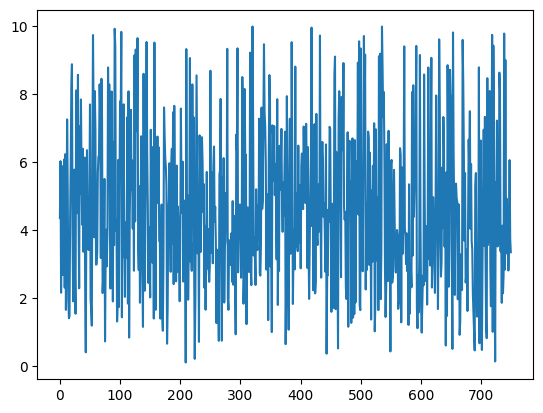

In [53]:
df['DistanceFromEHSC'].plot()

In [54]:
df['DistanceFromEHSC'].describe()

count    750.000000
mean       4.603878
std        2.307654
min        0.096575
25%        2.821600
50%        4.273026
75%        6.219849
max        9.978092
Name: DistanceFromEHSC, dtype: float64

# VISUALISING DISTRIBUTION OF DONORS WITH FOLIUM

In [55]:
m = folium.Map(location=[52.9548, -1.1581], zoom_start=12)

colors = ['green', 'yellow', 'orange', 'red', 'purple']
linear_colormap = LinearColormap(colors=colors,
                                 index=[0, 100, 250, 500, 1000],
                                 vmin=df['Transactions_LifetimeGiftsAmount'].min(),
                                 vmax=df['Transactions_LifetimeGiftsAmount'].quantile(0.94))

# Create FeatureGroups
fgroups = [folium.map.FeatureGroup(name=f"Total Donated:  £{lower}{('-£' + str(upper)) if upper != float('inf') else '+'}") for lower, upper in zip([0, 100, 250, 500, 750, 1000], [100, 250, 500, 750, 1000, float('inf')])]


for index, row in df.iterrows():    
    fname = 'Example'
    lname = 'Donor'
    email = 'exampledonor@email.com'
    
    total_don = row['Transactions_LifetimeGiftsAmount']
    num_don = row['Transactions_LifetimeGiftsNumber']
    avg_don = row['Transactions_AverageGiftAmount']
    
    news = bool(row['Newsletter'])
    monthly = bool(row['monthlyDonorMonths1to12'])
    
    lat = row['Latitude']
    long = row['Longitude']
    
    dateoffirst = row['Transactions_DateOfFirstGift'].strftime('%d/%m/%Y')
    dateoflast = row['Transactions_DateOfLastGift'].strftime('%d/%m/%Y')

    active = row['activeMonths']
    freq = row['DonationFrequency']
    freq_active = row['DonationFrequencyActive']

    dist = row['DistanceFromEHSC']
    
    popup_text = f'''
                    <div style="width: 200px; font-family: Arial; line-height: 1.2;">
                        <h4 style="margin-bottom: 5px;">{fname} {lname}</h4>
                        <p style="margin: 0;"><b>Total Donated:</b> £{total_don:.2f}</p>
                        <p style="margin: 0;"><b>Number of Donations:</b> {num_don}</p>
                        <p style="margin: 0;"><b>Average Donation:</b> £{avg_don:.2f}</p>
                        <br>\
                        <p style="margin: 0;"><b>First Recorded Donation:</b> {dateoffirst}</p>
                        <p style="margin: 0;"><b>Last Recorded Donation:</b> {dateoflast}</p>
                        <br>\
                        <p style="margin: 0;"><b>ActiveMonths:</b> {active}</p>
                        <p style="margin: 0;"><b>DonationFrequency</b> {freq:.2f}</p>
                        <p style="margin: 0;"><b>DonationFrequencyActive</b> {freq_active:.2f}</p>
                        <br>\
                        <p style="margin: 0;"><b>Subscribed to Newsletter:</b> {"Yes" if news else "No"}</p>
                        <p style="margin: 0;"><b>Current Monthly Donor:</b> {"Yes" if monthly else "No"}</p>
                        <br>\
                        <p style="margin: 0;"><b>Distance from EHSC:</b> {dist:.2f}km</p>
                        <br>\
                        <p style="margin: 0;"><b>Email:</b><br> {email}</p>
                    </div>
                    '''

    
    color = linear_colormap(total_don)
    
    marker = folium.CircleMarker(
        location=[lat, long],
        radius=5,
        color=color, 
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=popup_text
    )
    
    # Add the marker to the appropriate FeatureGroup
    for fgroup, (lower, upper) in zip(fgroups, zip([0, 100, 250, 500, 750, 1000], [100, 250, 500, 750, 1000, float('inf')])):
        if lower <= total_don < upper:
            fgroup.add_child(marker)
            break

# Add the FeatureGroups to the map
for fgroup in fgroups:
    m.add_child(fgroup)

linear_colormap.add_to(m)
linear_colormap.caption = 'Total Donated (£)'
m.add_child(folium.LayerControl())

# Create a new marker with a popup that is a web address
popup_html = '''<h4 style="margin-bottom: 5px;">Emmanuel House Support Centre</h4>
<a href="https://www.emmanuelhouse.org.uk/" target="_blank">https://www.emmanuelhouse.org.uk/</a>
<p>Emmanuel House is an independent charity that supports people who are homeless, rough sleeping, in crisis, or at risk of homelessness in Nottingham.</p>
'''
marker = folium.Marker(location=ehsc_coords, popup=folium.Popup(popup_html))
m.add_child(marker)

m

- Note the popups that appear when clicking on each datapoint in the above map!

- There is a layer control menu hidden in the top right corner until mouseover. It lets you show and hide the points with donation totals in specific ranges.

# REMARKS

- The distribution of the fictional donors contained in `data.csv` more closely resembles the distribution of the real donors than the synthetic data constructed in my previous blog post:\
                         [Investigating The Geographic Distribution Of Charity Donors With Interactive Maps Made Using Folium](https://danieljamessmith.github.io/blog/posts/eh2/)
- The Latitudes and Longitudes have been constructed to be the features following a distribution that is the least representative of the real data, for obvious privacy concerns. This is the reason for the donors on main roads, in Wollaton park etc.           
  